# Continuous Control

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

In [2]:
import random
import torch
import numpy as np
import datetime
from collections import deque

import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
import datetime
import time

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher.app")
```

In [4]:
env = UnityEnvironment(file_name='.\Reacher_Windows_x86_64 (1)\Reacher_Windows_x86_64\Reacher.exe')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [5]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

Run the code cell below to print some information about the environment.

In [6]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 1
Size of each action: 4
There are 1 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726671e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [8]:
env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
while True:
    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    print ('Rewards',rewards),.l
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    print('Scores' ,scores)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Rewards [0.0]
Scores [0.]
Rewards [0.0]
Scores [0.]
Rewards [0.0]
Scores [0.]
Rewards [0.0]
Scores [0.]
Rewards [0.0]
Scores [0.]
Rewards [0.0]
Scores [0.]
Rewards [0.0]
Scores [0.]
Rewards [0.0]
Scores [0.]
Rewards [0.0]
Scores [0.]
Rewards [0.0]
Scores [0.]
Rewards [0.0]
Scores [0.]
Rewards [0.0]
Scores [0.]
Rewards [0.0]
Scores [0.]
Rewards [0.0]
Scores [0.]
Rewards [0.0]
Scores [0.]
Rewards [0.0]
Scores [0.]
Rewards [0.0]
Scores [0.]
Rewards [0.0]
Scores [0.]
Rewards [0.0]
Scores [0.]
Rewards [0.0]
Scores [0.]
Rewards [0.0]
Scores [0.]
Rewards [0.0]
Scores [0.]
Rewards [0.0]
Scores [0.]
Rewards [0.0]
Scores [0.]
Rewards [0.0]
Scores [0.]
Rewards [0.0]
Scores [0.]
Rewards [0.0]
Scores [0.]
Rewards [0.0]
Scores [0.]
Rewards [0.0]
Scores [0.]
Rewards [0.0]
Scores [0.]
Rewards [0.0]
Scores [0.]
Rewards [0.0]
Scores [0.]
Rewards [0.0]
Scores [0.]
Rewards [0.0]
Scores [0.]
Rewards [0.0]
Scores [0.]
Rewards [0.0]
Scores [0.]
Rewards [0.0]
Scores [0.]
Rewards [0.0]
Scores [0.]
Rewards [0.0

In [9]:
#DeepDeterminsticPolicyGradient DDPG
from nn_model import Actor , Critic
from agent import AiAgent

In [10]:
#Test to create the instance of AiAgent
#state_size = np.array(state_size)
reacherAI = AiAgent(state_size,action_size,random_seed=9)
print(reacherAI.actor_local)
print(reacherAI.critic_local)

Actor(
  (fc1): Linear(in_features=33, out_features=24, bias=True)
  (fc2): Linear(in_features=24, out_features=48, bias=True)
  (fc3): Linear(in_features=48, out_features=4, bias=True)
)
Critic(
  (fcs1): Linear(in_features=33, out_features=24, bias=True)
  (fc2): Linear(in_features=28, out_features=48, bias=True)
  (fc3): Linear(in_features=48, out_features=1, bias=True)
)


In [8]:
env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
while True:
    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: 0.46999998949468136


In [22]:
# Deep Determinsitic Policy Gradient Algorithm

def Ddpg(n_episodes=1000, max_t=300, print_every=100):
    start_time = time.time()
    #scores = []
    scores = np.zeros(num_agents) 
    scores_window = deque(maxlen=print_every)  #Window for every 100 episodes
    
    for i_episode in range(1, n_episodes+1):
        #reset the unity Env_info for each new episode
        env_info = env.reset(train_mode=True)[brain_name]
        
        #set initial state
        state = env_info.vector_observations  #[0] Current state 
        #Reset
        reacherAI.reset()
        score = 0
        reward = 0
       
        
        while True: # t in range(max_t):
            #Select action based on  policy based
            action = reacherAI.act(state)
            #action = np.clip(action, -1, 1) #np.clip (0 or 1 )taken care in Agent.Act
            
            #Perform 'action'
            env_info = env.step(action)[brain_name]
            #Next State 
            next_state = env_info.vector_observations
            reward = env_info.rewards
            done   = env_info.local_done
            scores += reward                       
            if done :
                reacherAI.step (state, action,scores,next_state,done)
            
            state = next_state
           
            if np.any(done):
                break
            
        scores_window.append(scores)
       # scores.append(score)
        #avg_scores.append(np.mean(scores_window))
            
        print('\rEpisode {}\tAverage Score: {:.4f} '.format(i_episode,np.mean(scores)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Window Score: {:.4f}'.format(i_episode, np.mean(scores_window)))
            torch.save(reacherAI.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(reacherAI.critic_local.state_dict(), 'checkpoint_critic.pth')
        if np.mean(scores_window)>=30.0 and i_episode >100 :
            time_taken = time.time() - start_time
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.4f}'.format(i_episode-100, np.mean(scores)))
            torch.save(reacherAI.actor_local.state_dict(), 'checkpoint_actor30.pth')
            torch.save(reacherAI.critic_local.state_dict(), 'checkpoint_critic30.pth')
            print ('AiReacher took {} hrs & {} mins to solve the env in {} episodes '.format(int(time_taken/3600),int(time_taken/60,i_episode)))
            break
              
                   
    return scores


2020-07-19 14:40:36.167138
Episode 100	Average Window Score: 2.1000
Episode 200	Average Window Score: 5.0900
Episode 300	Average Window Score: 7.5300
Episode 400	Average Window Score: 10.1200
Episode 500	Average Window Score: 12.5600
Episode 600	Average Window Score: 14.7500
Episode 700	Average Window Score: 15.6500
Episode 800	Average Window Score: 16.5200
Episode 900	Average Window Score: 17.8000
Episode 1000	Average Window Score: 19.0200
6:01:00.466996


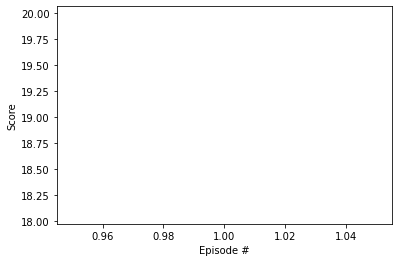

In [23]:
#Ver 7.1
start = datetime.datetime.now()
print (start)
scores = Ddpg()
endtime = datetime.datetime.now() -start
print (endtime)
fig = plt.figure()3
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

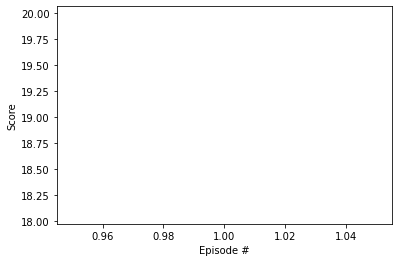

In [26]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

## Work Logs

In [13]:
#DDPG ALgo 
gamma = 0.997 
td_steps = 24

def Ddpg(n_episodes=3000, max_t=300, print_every=100):
    start_time = time.time()
    scores = []
    avg_scores = []
    scores_window = deque(maxlen=print_every)  #Window for every 100 episodes
    
    for i_episode in range(1, n_episodes+1):
        #reset the unity Env_info for each new episode
        env_info = env.reset(train_mode=True)[brain_name]
        
        #set initial state
        state = env_info.vector_observations  #[0] Current state 
        #Reset
        reacherAI.reset()
        score = 0
        cumlreward = 0
        steps = 0
        ep_scores = np.zeros(num_agents) 
        
        while True: # t in range(max_t):
            #Select action based on  policy based
            action = reacherAI.act(state)
            #action = np.clip(action, -1, 1) #np.clip (0 or 1 )taken care in Agent.Act
            
            #Perform 'action'
            env_info = env.step(action)[brain_name]
            #Next State 
            next_state = env_info.vector_observations
            reward = env_info.rewards
            done   = env_info.local_done
            
            #Discounted Reward
            cumlreward += torch.Tensor(reward).view(-1,1)*gamma**td_steps
            steps +=1
            
            if done or steps ==td_steps:
                #reacherAI.step (state, action,cumlreward,next_state,done)
                [reacherAI.step(states[i], actions[i], rewards[i], next_states[i], dones[i]) for i in range(num_agents)]
                steps = 0
                cumlreward = 0
            
            score += np.mean(reward)
            state = next_state
            #print('\rStep {}\t Current Reward: {:.4f} \t Acu.Score: {:.4f}'.format(i_episode,reward, score))
           
            if np.any(done):
                break
            
        scores_window.append(score)
        scores.append(score)
        avg_scores.append(np.mean(scores_window))
            
        print('\rEpisode {}\tAverage Score: {:.4f} \t Score: {:.4f}'.format(i_episode, np.mean(scores_window),score), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Window Score: {:.4f}'.format(i_episode, np.mean(scores_window)))
            torch.save(reacherAI.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(reacherAI.critic_local.state_dict(), 'checkpoint_critic.pth')
        if np.mean(scores_window)>=30.0 and i_episode >100 :
            time_taken = time.time() - start_time
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.4f}'.format(i_episode-100, np.mean(scores)))
            torch.save(reacherAI.actor_local.state_dict(), 'checkpoint_actor30.pth')
            torch.save(reacherAI.critic_local.state_dict(), 'checkpoint_critic30.pth')
            print ('AiReacher took {} hrs & {} mins to solve the env in {} episodes '.format(int(time_taken/3600),int(time_taken/60,i_episode)))
            break
              
                   
    return scores



Increased Buffer size so Replay Memory size wud be larger but Minibatch to see the correlations reduced to 75
Learning Rate made to .997 
Local to Target Network Sync - updated to 0.017 
Learning rate Actor increased to 0.003 but for critic made it 0.001

theta=0.17, sigma=0.24 - Noise sampling since major challenges cud see during training ..arm is just moving clock wise swing mostly. so need more exploration




In [12]:
#v6.1 Seed 3 20 Agents just a try  Batch Size
start = datetime.datetime.now()
print (start)
scores = Ddpg()
endtime = datetime.datetime.now() -start
print (endtime)
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

2020-07-19 14:17:36.863862
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]


C:\Users\senth\.conda\envs\drlnd\lib\site-packages\torch\nn\functional.py:1558: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0

TypeError: unsupported format string passed to list.__format__

In [ ]:
#v5.1 Seed 3 Batch Size
start = datetime.datetime.now()
print (start)
scores = Ddpg()
endtime = datetime.datetime.now() -start
print (endtime)
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

2020-07-19 00:46:43.903941
Episode 100	Average Window Score: 0.0145e: 0.0000
Episode 200	Average Window Score: 0.0095e: 0.0000
Episode 300	Average Window Score: 0.0108e: 0.0000
Episode 400	Average Window Score: 0.0156e: 0.0000
Episode 500	Average Window Score: 0.0123e: 0.0900
Episode 600	Average Window Score: 0.0095e: 0.0000
Episode 700	Average Window Score: 0.0159e: 0.1000
Episode 800	Average Window Score: 0.0144e: 0.0700
Episode 900	Average Window Score: 0.0132e: 0.0000
Episode 1000	Average Window Score: 0.0105e: 0.0000
Episode 1100	Average Window Score: 0.0144e: 0.0000
Episode 1200	Average Window Score: 0.0200e: 0.0000
Episode 1300	Average Window Score: 0.0113e: 0.1100
Episode 1400	Average Window Score: 0.0116e: 0.0000
Episode 1500	Average Window Score: 0.0141e: 0.0000
Episode 1600	Average Window Score: 0.0154e: 0.0000
Episode 1700	Average Window Score: 0.0120e: 0.0000
Episode 1800	Average Window Score: 0.0110e: 0.0000
Episode 1878	Average Score: 0.0145 	 Score: 0.0000

In [1]:
print (endtime)
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

NameError: name 'endtime' is not defined

BUFFER_SIZE = 50000    #int(1e4)  # replay buffer size
BATCH_SIZE = 480        #128        # minibatch size
GAMMA = 0.978            # discount factor
TAU = 0.002              # for soft update of target parameters
LR_ACTOR = 0.001         # learning rate of the actor 
LR_CRITIC =0.001        # learning rate of the critic
WEIGHT_DECAY = 0        # L2 weight decay


In [11]:
#v4.1 Seed 3 Batch Size
scores = Ddpg()

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

C:\Users\senth\.conda\envs\drlnd\lib\site-packages\torch\nn\functional.py:1558: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Episode 100	Average Window Score: 0.0172
Episode 200	Average Window Score: 0.0265
Episode 300	Average Window Score: 0.0319
Episode 398	Average Score: 0.0208

KeyboardInterrupt: 

In [11]:
#v3.1 Seed 786 Batch Size
scores = Ddpg()

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

C:\Users\senth\.conda\envs\drlnd\lib\site-packages\torch\nn\functional.py:1558: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Episode 100	Average Window Score: 0.0420
Episode 200	Average Window Score: 0.0133
Episode 300	Average Window Score: 0.0191
Episode 400	Average Window Score: 0.0127
Episode 500	Average Window Score: 0.0045
Episode 600	Average Window Score: 0.0247
Episode 670	Average Score: 0.0191

KeyboardInterrupt: 

C:\Users\senth\.conda\envs\drlnd\lib\site-packages\torch\nn\functional.py:1558: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Episode 100	Average Score: 0.0443
Episode 200	Average Score: 0.0492
Episode 300	Average Score: 0.0702
Episode 400	Average Score: 0.0581
Episode 500	Average Score: 0.0614
Episode 600	Average Score: 0.0808
Episode 700	Average Score: 0.0718
Episode 800	Average Score: 0.0570
Episode 900	Average Score: 0.0578
Episode 1000	Average Score: 0.0368


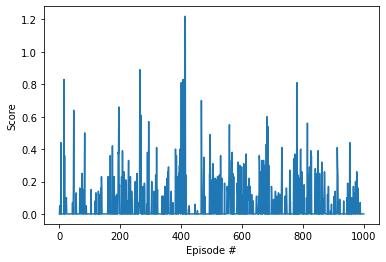

In [11]:
#v2.1 Seed 9 Batch Size
scores = Ddpg()

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

#param
BUFFER_SIZE = 100000    #int(1e4)  # replay buffer size
BATCH_SIZE = 240        #128        # minibatch size
GAMMA = 0.978            # discount factor
TAU = 0.001              # for soft update of target parameters
LR_ACTOR = 0.0001         # learning rate of the actor 
LR_CRITIC =0.0001        # learning rate of the critic
WEIGHT_DECAY = 0        # L2 weight decay


In [12]:
V3.1 - 10000 Episodes
BUFFER_SIZE = 500000    #int(1e4)  # replay buffer size
BATCH_SIZE = 240        #128        # minibatch size
GAMMA = 0.978            # discount factor
TAU = 0.0017              # for soft update of target parameters
LR_ACTOR = 0.0001         # learning rate of the actor 
LR_CRITIC =0.0001        # learning rate of the critic
WEIGHT_DECAY = 0        # L2 weight decay

Seed =9

SyntaxError: invalid syntax (<ipython-input-12-7b9c1264860a>, line 1)

In [ ]:
n_episodes
#v3.1 Seed 9 
scores = Ddpg(n_episodes=10000)

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [9]:
scores = Ddpg()

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

C:\Users\senth\.conda\envs\drlnd\lib\site-packages\torch\nn\functional.py:1558: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Episode 100	Average Score: 0.0295
Episode 200	Average Score: 0.0213
Episode 300	Average Score: 0.0156
Episode 400	Average Score: 0.0132
Episode 500	Average Score: 0.0090
Episode 600	Average Score: 0.0065
Episode 625	Average Score: 0.0065

KeyboardInterrupt: 

In [12]:
env.close()

In [ ]:
a = np.array(state_size)
a
t=torch.from_numpy(a)
a
state = torch.from_numpy(np.array(state_size)).to('cpu')
state

In [ ]:
type(state_size)

When finished, you can close the environment.

In [ ]:
print (torch.__version__)

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```